<a href="https://colab.research.google.com/github/raefkazi/Referral-Advice/blob/main/DS_RA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Data Preprocessing

## Read data

In [2]:
import pandas as pd
import numpy as np

import io
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving Dataset - LBP RA.xlsx to Dataset - LBP RA.xlsx


In [3]:
df = pd.read_excel(io.BytesIO(uploaded.get("Dataset - LBP RA.xlsx")),  sheet_name = "Training Dataset")
var = pd.read_excel(io.BytesIO(uploaded.get("Dataset - LBP RA.xlsx")),  sheet_name = "Variables")

In [4]:
df.head()

,Treatment,Fever,Duration_of_pain,Sick_leave,Earlier_hospitalization,Workoverload,Familiy_history,Depression,Extremely_nervous,Stress,...,Failure_symptoms,Incoordination,neck_pain_intensity,low_back_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,leg_right_pain_intensity,working_ability,Paidwork
0,1,1.0,10.0,0,1,NaN,0,0,0.0,0,...,1,NaN,0,8,8,7,6,6,NaN,0
1,3,1.0,10.0,0,1,0.0,1,0,0.0,1,...,1,1.0,7,8,7,4,0,0,7.0,1
2,1,1.0,10.0,0,1,NaN,0,0,6.0,1,...,1,0.0,3,5,0,2,0,3,NaN,0
3,5,1.0,10.0,0,1,NaN,0,0,1.0,1,...,0,NaN,2,9,0,0,9,5,NaN,0
4,1,1.0,10.0,0,1,NaN,0,0,0.0,1,...,1,NaN,0,7,5,0,0,0,NaN,0


In [5]:
(df.count()/1546*100).sort_values()

Workoverload                         29.689521
working_ability                      32.600259
Trauma                               56.015524
Relationship_with_colleagues         63.324709
Incoordination                       85.122898
Irrational_thoughts_work             88.163001
Loss_muscle_strength                 94.695990
Irrational_thoughts_risk_lasting     95.407503
Coping_strategy                      95.472186
Kinesiophobia_pain_stop              95.601552
Extremely_nervous                    96.636481
Kinesiophobia_physical_exercise      96.701164
Weightloss_per_year                  97.606727
Fever                                97.800776
Duration_of_pain                     97.994825
Uses_corticosteroids                 99.159120
Serious_disease                      99.223803
arm_left_pain_intensity             100.000000
arm_right_pain_intensity            100.000000
leg_left_pain_intensity             100.000000
neck_pain_intensity                 100.000000
leg_right_pai

## Dropping columns with more than 15% missing values

In [6]:
df_new = df.drop("Irrational_thoughts_work",1)
df_new = df_new.drop("Incoordination",1)
df_new = df_new.drop("Relationship_with_colleagues",1)
df_new = df_new.drop("Trauma",1)
df_new = df_new.drop("working_ability",1)
df_new = df_new.drop("Workoverload",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipyker

##Visualize missing values

In [7]:
#Data Completeness percentage
df2 = (df.count()/1546*100).sort_values().rename_axis('Features').reset_index(name='counts')
df2.set_index('Features')
df_filtered = df2[df2['counts'] < 100]
df_filtered

,Features,counts
0,Workoverload,29.689521
1,working_ability,32.600259
2,Trauma,56.015524
3,Relationship_with_colleagues,63.324709
4,Incoordination,85.122898
5,Irrational_thoughts_work,88.163001
6,Loss_muscle_strength,94.695990
7,Irrational_thoughts_risk_lasting,95.407503
8,Coping_strategy,95.472186
9,Kinesiophobia_pain_stop,95.601552


In [8]:
#df_filtered = df_filtered[df_filtered[100-'counts']]
df_filtered['inverted'] = 100-df_filtered.counts
df_filtered

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Features,counts,inverted
0,Workoverload,29.689521,70.310479
1,working_ability,32.600259,67.399741
2,Trauma,56.015524,43.984476
3,Relationship_with_colleagues,63.324709,36.675291
4,Incoordination,85.122898,14.877102
5,Irrational_thoughts_work,88.163001,11.836999
6,Loss_muscle_strength,94.695990,5.304010
7,Irrational_thoughts_risk_lasting,95.407503,4.592497
8,Coping_strategy,95.472186,4.527814
9,Kinesiophobia_pain_stop,95.601552,4.398448


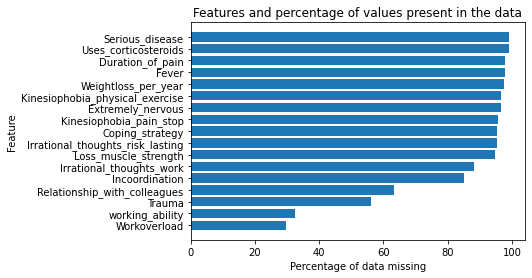

In [9]:
#create bar chart
import matplotlib.pyplot as plt

y_axis = df_filtered['Features']
x_axis = df_filtered['counts']

plt.barh (y_axis, x_axis)
plt.title('Features and percentage of values present in the data')
plt.ylabel('Feature')
plt.xlabel('Percentage of data missing')
plt.show()

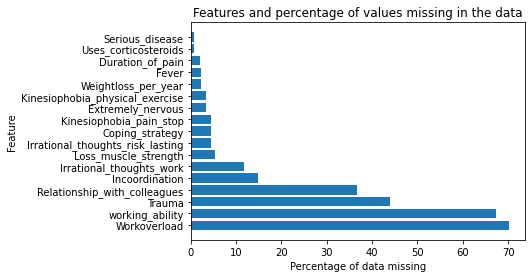

In [10]:
#create bar chart
import matplotlib.pyplot as plt

y_axis = df_filtered['Features']
x_axis = df_filtered['inverted']

plt.barh (y_axis, x_axis)
plt.title('Features and percentage of values missing in the data')
plt.ylabel('Feature')
plt.xlabel('Percentage of data missing')
plt.show()

In [11]:
df_new.columns

Index(['Treatment', 'Fever', 'Duration_of_pain', 'Sick_leave',
       'Earlier_hospitalization', 'Familiy_history', 'Depression',
       'Extremely_nervous', 'Stress', 'Irrational_thoughts_risk_lasting',
       'Coping_strategy', 'Kinesiophobia_physical_exercise',
       'Kinesiophobia_pain_stop', 'Age', 'Uses_analgesics',
       'Uses_corticosteroids', 'Serious_disease', 'Neurogenic_signals',
       'Continuous_pain', 'Decreased_mobility', 'Nocturnal_pain',
       'Weightloss_per_year', 'Loss_muscle_strength', 'Failure_symptoms',
       'neck_pain_intensity', 'low_back_pain_intensity',
       'arm_left_pain_intensity', 'arm_right_pain_intensity',
       'leg_left_pain_intensity', 'leg_right_pain_intensity', 'Paidwork'],
      dtype='object')

## Impute Missing Values

###One-hot Encoding Age column

In [12]:
#One-hot encode age
#One hot encoding
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [13]:
#Age encoding
df_new['age_ohe'] = array(df_new['Age'])
#integer encode
label_encoder = LabelEncoder()
age_encoded = label_encoder.fit_transform(df_new['age_ohe'])
df_new['age_ohe'] = array(age_encoded)

In [14]:
#Dropping original Age column
df_new = df_new.drop("Age",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


### Iterative Imputer

In [15]:
# iterative imputation transform
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data = df_new.values
ix = [i for i in range(data.shape[1]) if i != 0]
X, y = data[:, ix], data[:, 0]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer(max_iter = 50, skip_complete = True)
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 521
Missing: 0


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

In [17]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.469 (0.038)


In [18]:
feature_cols = ['Fever', 'Duration_of_pain', 'Sick_leave',
       'Earlier_hospitalization', 'Familiy_history', 'Depression',
       'Extremely_nervous', 'Stress', 'Irrational_thoughts_risk_lasting',
       'Coping_strategy', 'Kinesiophobia_physical_exercise',
       'Kinesiophobia_pain_stop', 'Uses_analgesics',
       'Uses_corticosteroids', 'Serious_disease', 'Neurogenic_signals',
       'Continuous_pain', 'Decreased_mobility', 'Nocturnal_pain',
       'Weightloss_per_year', 'Loss_muscle_strength', 'Failure_symptoms',
       'neck_pain_intensity', 'low_back_pain_intensity',
       'arm_left_pain_intensity', 'arm_right_pain_intensity',
       'leg_left_pain_intensity', 'leg_right_pain_intensity', 'Paidwork',
       'age_ohe']
X = df_new[feature_cols] # Features
y = df_new.Treatment # Target variable

In [19]:
X = pd.DataFrame(Xtrans, columns = feature_cols)

##Standard Scaling Data

In [20]:
from sklearn.preprocessing import StandardScaler
x = X.loc[:, feature_cols].values
#y = df_new.loc[:,['Treatment']].values
x = StandardScaler().fit_transform(x)
X = pd.DataFrame(x, columns = feature_cols)

In [21]:
X

,Fever,Duration_of_pain,Sick_leave,Earlier_hospitalization,Familiy_history,Depression,Extremely_nervous,Stress,Irrational_thoughts_risk_lasting,Coping_strategy,...,Loss_muscle_strength,Failure_symptoms,neck_pain_intensity,low_back_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,leg_right_pain_intensity,Paidwork,age_ohe
0,1.640359,0.535798,-0.656873,0.666978,-0.587808,-0.321710,-1.027434,-1.851972,0.879192,-1.529941,...,0.947948,0.346828,-0.577630,0.583078,3.708302,3.149029,0.925116,0.926929,-0.699573,1.457135
1,1.640359,0.535798,-0.656873,0.666978,1.701237,-0.321710,-1.027434,0.539965,-0.791042,1.177440,...,0.947948,0.346828,1.955235,0.583078,3.199874,1.645664,-0.812356,-0.803438,1.429443,0.148549
2,1.640359,0.535798,-0.656873,0.666978,-0.587808,-0.321710,0.963109,0.539965,0.461634,-0.756404,...,-1.110131,0.346828,0.507884,-0.601985,-0.359123,0.643420,-0.812356,0.061746,-0.699573,0.148549
3,1.640359,0.535798,-0.656873,0.666978,-0.587808,-0.321710,-0.695677,0.539965,1.296751,-1.143172,...,0.947948,-2.883271,0.146046,0.978099,-0.359123,-0.358824,1.793852,0.638534,-0.699573,0.148549
4,1.640359,0.535798,-0.656873,0.666978,-0.587808,-0.321710,-1.027434,0.539965,0.044075,1.177440,...,-1.110131,0.346828,-0.577630,0.188057,2.183018,-0.358824,-0.812356,-0.803438,-0.699573,0.148549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,-0.610885,-0.790924,1.522365,-1.499300,-0.587808,-0.321710,-0.032163,0.539965,0.461634,-0.369635,...,0.947948,0.346828,-0.577630,0.583078,-0.359123,-0.358824,-0.812356,-0.803438,1.429443,0.148549
1542,-0.610885,0.535798,-0.656873,-1.499300,-0.587808,-0.321710,-1.027434,0.539965,1.296751,0.403902,...,-1.110131,0.346828,-0.577630,1.373120,-0.359123,-0.358824,-0.812356,1.792112,-0.699573,0.802842
1543,-0.610885,0.535798,-0.656873,0.666978,1.701237,3.108387,1.626624,0.539965,-0.791042,-1.143172,...,0.947948,0.346828,-0.577630,0.583078,-0.359123,-0.358824,-0.812356,1.503718,-0.699573,0.802842
1544,-0.610885,0.535798,1.522365,0.666978,1.701237,-0.321710,-0.032163,-1.851972,0.461634,1.177440,...,0.947948,0.346828,-0.577630,0.583078,-0.359123,-0.358824,-0.812356,-0.803438,1.429443,0.148549


## Over and Undersampling

In [22]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

###Visualize class imbalance

In [24]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({1: 659, 5: 649, 2: 160, 3: 65, 4: 13})


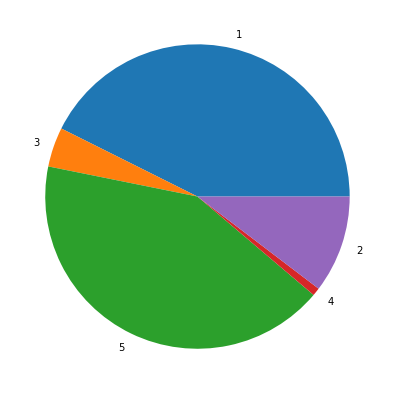

In [26]:
df_counter = pd.DataFrame.from_dict(counter, orient='index').reset_index()
#create Pie chart
from matplotlib import pyplot as plt
import numpy as np
 
# Creating dataset
features = df_counter['index']

data = df_counter[0]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = features)
 
# show plot
plt.show()

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [28]:
over = SMOTE()
under = RandomUnderSampler()

In [29]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [30]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [31]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 659, 2: 659, 3: 659, 4: 659, 5: 659})


#Feature analysis

##PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca_model = PCA(n_components=10).fit(X)
X_pc = pca_model.transform(X)

# number of components
n_pcs= pca_model.components_.shape[0]

In [34]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca_model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = feature_cols
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
pca_mostimp = pd.DataFrame(dic.items())

In [35]:
pca_mostimp

,0,1
0,PC0,Fever
1,PC1,Kinesiophobia_physical_exercise
2,PC2,Kinesiophobia_pain_stop
3,PC3,leg_left_pain_intensity
4,PC4,Duration_of_pain
5,PC5,arm_left_pain_intensity
6,PC6,Loss_muscle_strength
7,PC7,Coping_strategy
8,PC8,leg_right_pain_intensity
9,PC9,Stress


In [36]:
X_selection_pca = X[["Fever", "Decreased_mobility", "Kinesiophobia_pain_stop","leg_left_pain_intensity", "Duration_of_pain", "arm_left_pain_intensity", "Stress","Coping_strategy" ]]

In [37]:
X_selection_pca

,Fever,Decreased_mobility,Kinesiophobia_pain_stop,leg_left_pain_intensity,Duration_of_pain,arm_left_pain_intensity,Stress,Coping_strategy
0,1.640359,0.702147,-0.378192,0.925116,0.535798,3.708302,-1.851972,-1.529941
1,1.640359,-0.296797,-0.378192,-0.812356,0.535798,-0.359123,0.539965,-0.756404
2,1.640359,-0.429990,0.439210,-0.812356,0.535798,2.183018,0.539965,1.177440
3,1.640359,0.768743,-2.012998,-0.812356,-0.790924,-0.359123,0.539965,-0.756404
4,1.640359,-1.828512,-2.012998,-0.812356,0.188663,-0.359123,-1.851972,0.189502
...,...,...,...,...,...,...,...,...
3290,-0.610885,0.635551,0.439210,1.504274,0.535798,-0.359123,0.539965,0.017134
3291,-0.610885,0.102781,0.847912,1.504274,0.535798,2.183018,0.539965,0.790671
3292,1.640359,-1.695319,0.847912,0.635537,-1.454286,1.166162,-1.851972,0.403902
3293,-0.610885,-1.695319,0.030509,-0.812356,-1.454286,-0.359123,0.539965,-1.529941


In [38]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_selection_pca, y, test_size=test_size, random_state=seed)

In [39]:
pca_model.explained_variance_ratio_

array([0.16362004, 0.07856586, 0.06288811, 0.05681586, 0.05335111,
       0.04997399, 0.04236068, 0.0391678 , 0.03494829, 0.03447694])

###Random forest

In [40]:
# Random  forest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rd_model = rf_model.fit(X_train, y_train)

# make predictions for test data
y_pred = rf_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.95 degrees.


In [41]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.91%


In [42]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[106,  14,   8,   5,  72],
       [ 34, 156,  17,   8,  18],
       [ 12,   9, 180,   6,   9],
       [  3,   3,   1, 199,   0],
       [110,  13,  14,   4,  87]])

In [43]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.40      0.52      0.45       205
           2       0.80      0.67      0.73       233
           3       0.82      0.83      0.83       216
           4       0.90      0.97      0.93       206
           5       0.47      0.38      0.42       228

    accuracy                           0.67      1088
   macro avg       0.68      0.67      0.67      1088
weighted avg       0.68      0.67      0.67      1088



##Recursive feature elimination

In [44]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs', max_iter = 500)
rfe = RFE(model, n_features_to_select = 10)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [ True False False False  True False False False False False False False
  True False  True False  True False False False False False  True False
  True  True  True False False  True]
Feature Ranking: [ 1  4 20 14  1 10 11  8 19 16  6 18  1  3  1  5  1 15 12 17 13 21  1  7
  1  1  1  2  9  1]


In [45]:
for feature in fit.support_.nonzero():
  print(X.columns[feature])

Index(['Fever', 'Familiy_history', 'Uses_analgesics', 'Serious_disease',
       'Continuous_pain', 'neck_pain_intensity', 'arm_left_pain_intensity',
       'arm_right_pain_intensity', 'leg_left_pain_intensity', 'age_ohe'],
      dtype='object')


In [46]:
X_selection_rfe = X[X.columns[feature]]
X_selection_rfe

,Fever,Familiy_history,Uses_analgesics,Serious_disease,Continuous_pain,neck_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,age_ohe
0,1.640359,-0.587808,-1.131475,1.537495,0.171156,-0.577630,3.708302,3.149029,0.925116,1.457135
1,1.640359,-0.587808,-1.131475,1.537495,0.171156,0.507884,-0.359123,0.643420,-0.812356,0.148549
2,1.640359,-0.587808,-1.131475,1.537495,0.171156,-0.577630,2.183018,-0.358824,-0.812356,0.148549
3,1.640359,-0.587808,-1.131475,-0.652203,0.171156,2.317073,-0.359123,-0.358824,-0.812356,-1.160037
4,1.640359,-0.587808,-1.131475,1.537495,0.171156,1.593397,-0.359123,3.149029,-0.812356,0.148549
...,...,...,...,...,...,...,...,...,...,...
3290,-0.610885,-0.587808,0.883802,-0.652203,0.171156,1.231559,-0.359123,-0.358824,1.504274,-1.160037
3291,-0.610885,-0.587808,0.883802,-0.652203,0.171156,1.231559,2.183018,-0.358824,1.504274,-1.160037
3292,1.640359,-0.587808,-1.131475,1.537495,0.171156,1.593397,1.166162,2.146785,0.635537,0.148549
3293,-0.610885,-0.587808,-1.131475,-0.652203,0.171156,-0.577630,-0.359123,-0.358824,-0.812356,-1.814330


In [47]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_selection_rfe, y, test_size=test_size, random_state=seed)

###Random forest

In [48]:
# Random  forest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rd_model = rf_model.fit(X_train, y_train)

# make predictions for test data
y_pred = rf_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.0 degrees.


In [49]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.50%


In [50]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[ 89,  21,   9,   7,  79],
       [ 23, 154,  13,   4,  39],
       [ 10,  28, 149,  20,   9],
       [  1,   6,  11, 186,   2],
       [ 87,  19,  15,   5, 102]])

In [51]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.42      0.43      0.43       205
           2       0.68      0.66      0.67       233
           3       0.76      0.69      0.72       216
           4       0.84      0.90      0.87       206
           5       0.44      0.45      0.44       228

    accuracy                           0.62      1088
   macro avg       0.63      0.63      0.63      1088
weighted avg       0.63      0.62      0.62      1088



###XGBoost

In [52]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [53]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [54]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [55]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.25%


In [56]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[106,  22,  10,  13,  54],
       [ 41, 143,  10,  11,  28],
       [  7,  37, 127,  37,   8],
       [  1,   7,  17, 181,   0],
       [ 97,  36,  25,  15,  55]])

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.42      0.52      0.46       205
           2       0.58      0.61      0.60       233
           3       0.67      0.59      0.63       216
           4       0.70      0.88      0.78       206
           5       0.38      0.24      0.29       228

    accuracy                           0.56      1088
   macro avg       0.55      0.57      0.55      1088
weighted avg       0.55      0.56      0.55      1088



###K-Fold Cross Validation

In [58]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.702 (0.026)


##Univariate selection

In [59]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# feature extraction
test = SelectKBest(score_func=f_classif, k=8)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_,)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 26.571  37.697  34.583   9.84   46.114  12.671   8.164  14.58   11.981
  22.702  37.1    16.328  17.608  30.099  34.857  24.271  11.637   3.443
  25.305   7.013  19.282   8.248  65.12    4.047  22.961  38.883  60.845
  66.326  69.221 136.947]
[[ 0.536 -0.588 -0.578  3.149  0.925  0.927 -0.7    1.457]
 [ 0.536 -0.588  0.508  0.643 -0.812  0.062 -0.7    0.149]
 [ 0.536 -0.588 -0.578 -0.359 -0.812 -0.803 -0.7    0.149]
 [-0.791 -0.588  2.317 -0.359 -0.812 -0.803 -0.7   -1.16 ]
 [ 0.189 -0.588  1.593  3.149 -0.812  0.35  -0.7    0.149]]


In [60]:
#import needed packages
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

#X, y = load_digits(return_X_y=True)
#df = pd.DataFrame(X, columns= ['feaure %s'%i for i in range(X.shape[1])])

# feature extraction
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_,)
features = fit.transform(X)
X.shape
X.columns[fit.get_support()]

[ 26.571  37.697  34.583   9.84   46.114  12.671   8.164  14.58   11.981
  22.702  37.1    16.328  17.608  30.099  34.857  24.271  11.637   3.443
  25.305   7.013  19.282   8.248  65.12    4.047  22.961  38.883  60.845
  66.326  69.221 136.947]


Index(['Duration_of_pain', 'Familiy_history',
       'Kinesiophobia_physical_exercise', 'Serious_disease',
       'neck_pain_intensity', 'arm_right_pain_intensity',
       'leg_left_pain_intensity', 'leg_right_pain_intensity', 'Paidwork',
       'age_ohe'],
      dtype='object')

In [61]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

#apply SelectKBest class to extract top 10 best features
#bestfeatures = SelectKBest(score_func=chi2, k=10)
#fit = bestfeatures.fit(X,y)
# feature extraction
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features

                               Specs       Score
29                           age_ohe  136.947406
28                          Paidwork   69.220964
27          leg_right_pain_intensity   66.325508
22               neck_pain_intensity   65.119812
26           leg_left_pain_intensity   60.844929
4                    Familiy_history   46.114381
25          arm_right_pain_intensity   38.882558
1                   Duration_of_pain   37.697191
10   Kinesiophobia_physical_exercise   37.099847
14                   Serious_disease   34.856602
2                         Sick_leave   34.582882
13              Uses_corticosteroids   30.099144
0                              Fever   26.571038
18                    Nocturnal_pain   25.304658
15                Neurogenic_signals   24.271340
24           arm_left_pain_intensity   22.961184
9                    Coping_strategy   22.702411
20              Loss_muscle_strength   19.281889
12                   Uses_analgesics   17.607913
11           Kinesio

In [62]:
X_selected_univariate = X[X.columns[fit.get_support()]]

In [64]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_selected_univariate, y, test_size=test_size, random_state=seed)

## Feature importance from random forest

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [67]:
# Random  forest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rd_model = rf_model.fit(X_train, y_train)

In [68]:
# make predictions for test data
y_pred = rf_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.75 degrees.


In [69]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.03%


In [70]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[132,   6,   1,   0,  66],
       [ 21, 194,   2,   1,  15],
       [  4,   0, 211,   1,   0],
       [  0,   1,   0, 205,   0],
       [104,  13,   2,   2, 107]])

In [71]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.51      0.64      0.57       205
           2       0.91      0.83      0.87       233
           3       0.98      0.98      0.98       216
           4       0.98      1.00      0.99       206
           5       0.57      0.47      0.51       228

    accuracy                           0.78      1088
   macro avg       0.79      0.78      0.78      1088
weighted avg       0.79      0.78      0.78      1088



###Obtaining feature importance and selecting features

<BarContainer object of 30 artists>

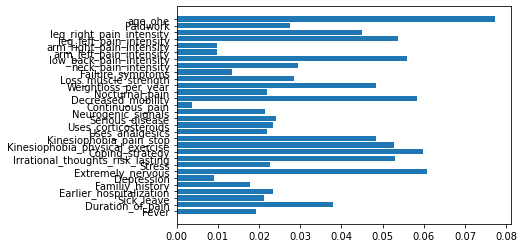

In [72]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#import shap
from matplotlib import pyplot as plt
plt.barh(X.columns, rf_model.feature_importances_)

<Figure size 144x144 with 0 Axes>

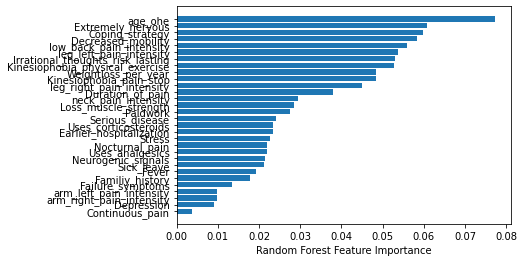

<Figure size 144x144 with 0 Axes>

In [73]:
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.figure(figsize=(2, 2))

In [74]:
rf_features = pd.DataFrame(X.columns[sorted_idx])
rf_scores = pd.DataFrame(rf_model.feature_importances_[sorted_idx])
rf_features['Scores'] = rf_scores
rf_features['Features']=rf_features[0]
rf_features = rf_features.nlargest(10, 'Scores')['Features']
rf_features


29                             age_ohe
28                   Extremely_nervous
27                     Coping_strategy
26                  Decreased_mobility
25             low_back_pain_intensity
24             leg_left_pain_intensity
23    Irrational_thoughts_risk_lasting
22     Kinesiophobia_physical_exercise
21                 Weightloss_per_year
20             Kinesiophobia_pain_stop
Name: Features, dtype: object

In [76]:
X_selected_rf = X[['age_ohe', 'Decreased_mobility', 'Kinesiophobia_physical_exercise', 'Extremely_nervous', 'Coping_strategy', 'low_back_pain_intensity','Irrational_thoughts_risk_lasting','leg_left_pain_intensity', 'leg_right_pain_intensity', 'Kinesiophobia_pain_stop']]


In [77]:
#obtaining feature importance using permutation from random forest: (second method to obtain feature importnance)
#this is computationally very extensive!!
#from sklearn.inspection import permutation_importance
#perm_importance = permutation_importance(rf_model, X_test, y_test)
#sorted_idx = perm_importance.importances_mean.argsort()
#plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
#plt.xlabel("Permutation Importance")


### Random forest with selected features from Random forest featre importance

In [78]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_selected_rf, y, test_size=test_size, random_state=seed)

In [79]:
# Random  forest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rd_model = rf_model.fit(X_train, y_train)

In [80]:
# make predictions for test data
y_pred = rf_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.86 degrees.


In [81]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.89%


In [82]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[104,  15,   6,   4,  76],
       [ 21, 187,   4,   3,  18],
       [ 10,   1, 201,   1,   3],
       [  0,   1,   0, 204,   1],
       [ 97,  23,   8,   3,  97]])

In [83]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.45      0.51      0.48       205
           2       0.82      0.80      0.81       233
           3       0.92      0.93      0.92       216
           4       0.95      0.99      0.97       206
           5       0.50      0.43      0.46       228

    accuracy                           0.73      1088
   macro avg       0.73      0.73      0.73      1088
weighted avg       0.73      0.73      0.73      1088



###Decision Tree with random forest top 10 features


In [84]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()
# Fit data to Decision Tree Classifer
dt_model = dt_model.fit(X_train,y_train)

In [85]:
#Predict the response for test dataset
y_pred = dt_model.predict(X_test)
#round values of y_pred
dt_predictions = [round(value) for value in y_pred]

In [86]:
# evaluate predictions
accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.03%


In [87]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 94,  25,  14,   7,  65],
       [ 31, 140,  18,   4,  40],
       [ 14,  15, 160,   9,  18],
       [  2,   4,   2, 193,   5],
       [ 87,  37,  17,  10,  77]])

In [88]:
#show the performance of the decision tree classification model using the classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.41      0.46      0.43       205
           2       0.63      0.60      0.62       233
           3       0.76      0.74      0.75       216
           4       0.87      0.94      0.90       206
           5       0.38      0.34      0.36       228

    accuracy                           0.61      1088
   macro avg       0.61      0.61      0.61      1088
weighted avg       0.61      0.61      0.61      1088



###XGBoost with random forst top ten features

In [89]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [90]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [91]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.26%


In [92]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[105,  20,   6,  11,  63],
       [ 32, 150,  15,  14,  22],
       [  9,  15, 180,   5,   7],
       [  1,   7,   0, 198,   0],
       [102,  29,  11,   9,  77]])

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.42      0.51      0.46       205
           2       0.68      0.64      0.66       233
           3       0.85      0.83      0.84       216
           4       0.84      0.96      0.89       206
           5       0.46      0.34      0.39       228

    accuracy                           0.65      1088
   macro avg       0.65      0.66      0.65      1088
weighted avg       0.65      0.65      0.65      1088



###K Fold cross validation


In [94]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(dt_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.662 (0.015)


#Final Feature selection


In [95]:
final_selection = pd.DataFrame(['Duration_of_pain', 'Sick_leave', 'Familiy_history',
       'Kinesiophobia_physical_exercise', 'neck_pain_intensity',
       'arm_right_pain_intensity', 'leg_left_pain_intensity',
       'leg_right_pain_intensity', 'Paidwork', 'age_ohe','Fever', 'Familiy_history', 'Uses_analgesics', 'Serious_disease',
       'Continuous_pain', 'neck_pain_intensity', 'arm_left_pain_intensity',
       'arm_right_pain_intensity', 'leg_left_pain_intensity', 'age_ohe','Uses_corticosteroids', 'Serious_disease', 'neck_pain_intensity',
       'Neurogenic_signals', 'Kinesiophobia_physical_exercise', 'age_ohe',
       'Nocturnal_pain', 'Paidwork', 'leg_left_pain_intensity',
       'Extremely_nervous'])

In [96]:
final_selection = final_selection.drop_duplicates().reset_index()
final_selection

,index,0
0,0,Duration_of_pain
1,1,Sick_leave
2,2,Familiy_history
3,3,Kinesiophobia_physical_exercise
4,4,neck_pain_intensity
5,5,arm_right_pain_intensity
6,6,leg_left_pain_intensity
7,7,leg_right_pain_intensity
8,8,Paidwork
9,9,age_ohe


# Model Comparison for classification on 5 classes

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [98]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

##XGBoost

In [99]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier(n_estimators = 200)
model.fit(X_train, y_train)

XGBClassifier(n_estimators=200, objective='multi:softprob')

In [100]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [101]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.33%


In [102]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[112,  12,   4,   1,  76],
       [ 26, 167,   9,   2,  29],
       [  8,   2, 200,   1,   5],
       [  3,   0,   0, 203,   0],
       [ 95,  19,   6,   3, 105]])

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.46      0.55      0.50       205
           2       0.83      0.72      0.77       233
           3       0.91      0.93      0.92       216
           4       0.97      0.99      0.98       206
           5       0.49      0.46      0.47       228

    accuracy                           0.72      1088
   macro avg       0.73      0.73      0.73      1088
weighted avg       0.73      0.72      0.73      1088



###K-Fold Cross Validation

In [104]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.734 (0.020)


##Logistic Regression

In [106]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data (Train)
lr_model = logreg.fit(X_train,y_train)

In [107]:
#make predictions using test data
y_pred=logreg.predict(X_test)
#round values of y_pred
lr_predictions = [round(value) for value in y_pred]

In [108]:
# evaluate predictions
accuracy = accuracy_score(y_test, lr_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 51.10%


In [109]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 60,  57,  34,  30,  24],
       [ 34, 128,  20,  19,  32],
       [ 18,  11, 134,  32,  21],
       [  1,   5,   7, 191,   2],
       [ 45,  58,  54,  28,  43]])

In [110]:
#show the performance of the logistic regression classification model using the classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.38      0.29      0.33       205
           2       0.49      0.55      0.52       233
           3       0.54      0.62      0.58       216
           4       0.64      0.93      0.75       206
           5       0.35      0.19      0.25       228

    accuracy                           0.51      1088
   macro avg       0.48      0.52      0.49      1088
weighted avg       0.48      0.51      0.48      1088



###K Fold cross validation

In [111]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(lr_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.510 (0.025)


##Decision Tree


In [112]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()
# Fit data to Decision Tree Classifer
dt_model = dt_model.fit(X_train,y_train)

In [113]:
#Predict the response for test dataset
y_pred = dt_model.predict(X_test)
#round values of y_pred
dt_predictions = [round(value) for value in y_pred]

In [114]:
# evaluate predictions
accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.59%


In [115]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 93,  33,  11,   4,  64],
       [ 29, 159,  16,   6,  23],
       [  6,  13, 167,   8,  22],
       [  1,   4,   1, 198,   2],
       [104,  33,  16,  11,  64]])

In [116]:
#show the performance of the decision tree classification model using the classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.40      0.45      0.42       205
           2       0.66      0.68      0.67       233
           3       0.79      0.77      0.78       216
           4       0.87      0.96      0.91       206
           5       0.37      0.28      0.32       228

    accuracy                           0.63      1088
   macro avg       0.62      0.63      0.62      1088
weighted avg       0.61      0.63      0.62      1088



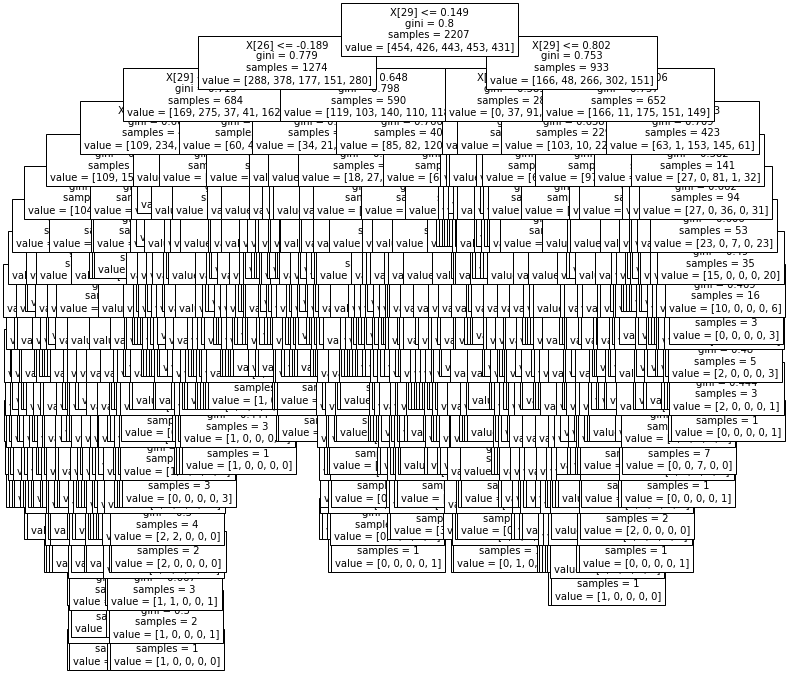

In [117]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(dt_model, fontsize=10)
plt.show()

###K Fold cross validation


In [118]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(dt_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.664 (0.021)


##Random Forest

In [119]:
# Random  forest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rd_model = rf_model.fit(X_train, y_train)

In [120]:
# make predictions for test data
y_pred = rf_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.75 degrees.


In [121]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.03%


In [122]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[132,   6,   1,   0,  66],
       [ 21, 194,   2,   1,  15],
       [  4,   0, 211,   1,   0],
       [  0,   1,   0, 205,   0],
       [104,  13,   2,   2, 107]])

In [123]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.51      0.64      0.57       205
           2       0.91      0.83      0.87       233
           3       0.98      0.98      0.98       216
           4       0.98      1.00      0.99       206
           5       0.57      0.47      0.51       228

    accuracy                           0.78      1088
   macro avg       0.79      0.78      0.78      1088
weighted avg       0.79      0.78      0.78      1088



###K Fold cross validation

In [124]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(rf_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.789 (0.022)


## Support Vector Machine

In [125]:
#SVM
#Support Vector Machine
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [126]:
# make predictions for test data
y_pred = svm_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.36%


In [127]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[111,  31,   7,   1,  55],
       [ 21, 197,   6,   0,   9],
       [  0,   1, 215,   0,   0],
       [  0,   0,   0, 206,   0],
       [ 97,  37,  11,   3,  80]])

In [128]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.48      0.54      0.51       205
           2       0.74      0.85      0.79       233
           3       0.90      1.00      0.95       216
           4       0.98      1.00      0.99       206
           5       0.56      0.35      0.43       228

    accuracy                           0.74      1088
   macro avg       0.73      0.75      0.73      1088
weighted avg       0.73      0.74      0.73      1088



###K-Fold Cross Validation

In [129]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(svm_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.756 (0.023)


#Reduced Features Comparison

In [132]:
"""
#from XGBoost suggested columns
feature_cols_new = ['Uses_corticosteroids', 'Serious_disease', 'neck_pain_intensity',
       'Neurogenic_signals', 'Kinesiophobia_physical_exercise', 'age_ohe',
       'Nocturnal_pain', 'Paidwork', 'leg_left_pain_intensity',
       'Extremely_nervous']
"""
"""
#Univariate Selection columns
feature_cols_new = ['age_ohe', 'leg_left_pain_intensity', 'neck_pain_intensity',
       'leg_right_pain_intensity', 'Paidwork',
       'Familiy_history', 'Duration_of_pain',
       'arm_right_pain_intensity', 'Kinesiophobia_physical_exercise', 'Sick_leave']
"""
"""
#PCA columns
feature_cols_new = ['Fever', 'Decreased_mobility', 'Kinesiophobia_pain_stop',
       'leg_left_pain_intensity','Duration_of_pain',
       'arm_left_pain_intensity','Loss_muscle_strength',
       'Irrational_thoughts_risk_lasting', 'Stress', 'Weightloss_per_year'
       ]
"""
"""
#Tweaked PCA columns
feature_cols_new = ['Fever', 'Decreased_mobility', 'Kinesiophobia_pain_stop',
       'leg_left_pain_intensity','Duration_of_pain',
       'arm_left_pain_intensity','age_ohe'
       ]

"""
"""
#Column vs accuracy comparison
"""
"""
feature_cols_new = ['age_ohe', 'leg_right_pain_intensity', 'neck_pain_intensity',
      'leg_left_pain_intensity','Duration_of_pain','low_back_pain_intensity','Fever',
      'Paidwork','Familiy_history','arm_right_pain_intensity', 'Sick_leave','Uses_corticosteroids',
      'Serious_disease', 'Kinesiophobia_physical_exercise', 'Neurogenic_signals', 'Coping_strategy',
      'Nocturnal_pain', 'arm_left_pain_intensity','Loss_muscle_strength', 'Irrational_thoughts_risk_lasting',
      'Stress','Earlier_hospitalization', 'Failure_symptoms','Uses_analgesics', 'Kinesiophobia_pain_stop',
      'Depression','Continuous_pain','Extremely_nervous','Weightloss_per_year','Decreased_mobility'
      ]
"""
#final selection: 7 features, 64.7% accuracy -> added 1 more from RF feature importnance :  'Decreased_mobility'
feature_cols_new = ['age_ohe', 'leg_right_pain_intensity', 'neck_pain_intensity',
       'leg_left_pain_intensity','Duration_of_pain',
       'low_back_pain_intensity','Fever']

#feature_cols = ['Duration_of_pain', 'Kinesiophobia_physical_exercise', 'Kinesiophobia_pain_stop', 'Continuous_pain', 'neck_pain_intensity', 'leg_left_pain_intensity', 'age_ohe']
X_new = X[feature_cols_new] # Features
#X_new = X[X.columns.difference(feature_cols_new)]
y_new = y # Target variable

In [133]:
len(X_new.columns)

7

In [134]:
X_new.columns

Index(['age_ohe', 'leg_right_pain_intensity', 'neck_pain_intensity',
       'leg_left_pain_intensity', 'Duration_of_pain',
       'low_back_pain_intensity', 'Fever'],
      dtype='object')

In [135]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=test_size, random_state=seed)

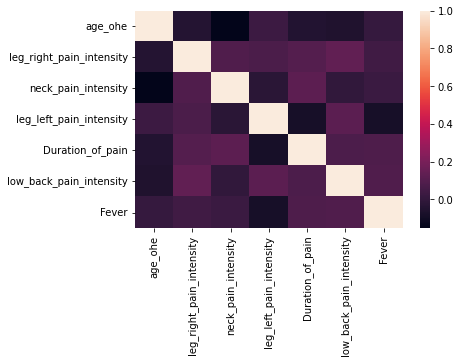

In [136]:
corr = X_new.corr()

import seaborn as sns
sns.heatmap(corr)

##Random Forest

In [137]:
# Random  forest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rd_model = rf_model.fit(X_train, y_train)

# make predictions for test data
y_pred = rf_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.92 degrees.


In [138]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.03%


In [139]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[105,  23,   8,   3,  66],
       [ 28, 165,   7,   2,  31],
       [  5,   5, 195,   5,   6],
       [  3,   4,   0, 199,   0],
       [103,  22,  11,   5,  87]])

In [140]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.43      0.51      0.47       205
           2       0.75      0.71      0.73       233
           3       0.88      0.90      0.89       216
           4       0.93      0.97      0.95       206
           5       0.46      0.38      0.42       228

    accuracy                           0.69      1088
   macro avg       0.69      0.69      0.69      1088
weighted avg       0.69      0.69      0.69      1088



## Support Vector Machine

In [141]:
#SVM
#Support Vector Machine
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [142]:
# make predictions for test data
y_pred = svm_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.08%


In [143]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[ 69,  52,  24,  32,  28],
       [ 24, 164,  16,  15,  14],
       [  7,  20, 153,  21,  15],
       [  1,   2,   0, 203,   0],
       [ 60,  65,  46,  25,  32]])

In [144]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.43      0.34      0.38       205
           2       0.54      0.70      0.61       233
           3       0.64      0.71      0.67       216
           4       0.69      0.99      0.81       206
           5       0.36      0.14      0.20       228

    accuracy                           0.57      1088
   macro avg       0.53      0.57      0.53      1088
weighted avg       0.53      0.57      0.53      1088



##XGBoost 

In [145]:
# split data into train and test sets
#seed = 7
#test_size = 0.33
#X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=test_size, random_state=seed)

# fit model no training data
xg_model = XGBClassifier(n_estimators = 200)
xg_model.fit(X_train, y_train)

# make predictions for test data
y_pred = xg_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [146]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.65%


In [147]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[130,   8,   6,   1,  60],
       [ 30, 152,  14,   5,  32],
       [  8,  20, 168,  10,  10],
       [  4,   3,   2, 196,   1],
       [110,  14,   8,   6,  90]])

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.46      0.63      0.53       205
           2       0.77      0.65      0.71       233
           3       0.85      0.78      0.81       216
           4       0.90      0.95      0.92       206
           5       0.47      0.39      0.43       228

    accuracy                           0.68      1088
   macro avg       0.69      0.68      0.68      1088
weighted avg       0.69      0.68      0.68      1088



#Binary classification using classes 1 and 5

##Pre-processing of data


In [149]:
#select data for only classes 1 and 5

### Read data

In [150]:
df = pd.read_excel(io.BytesIO(uploaded.get("Dataset - LBP RA.xlsx")),  sheet_name = "Training Dataset")
var = pd.read_excel(io.BytesIO(uploaded.get("Dataset - LBP RA.xlsx")),  sheet_name = "Variables")

### Dropping columns with more than 15% missing values

In [151]:
#Data Completeness percentage
(df.count()/1546*100).sort_values()

Workoverload                         29.689521
working_ability                      32.600259
Trauma                               56.015524
Relationship_with_colleagues         63.324709
Incoordination                       85.122898
Irrational_thoughts_work             88.163001
Loss_muscle_strength                 94.695990
Irrational_thoughts_risk_lasting     95.407503
Coping_strategy                      95.472186
Kinesiophobia_pain_stop              95.601552
Extremely_nervous                    96.636481
Kinesiophobia_physical_exercise      96.701164
Weightloss_per_year                  97.606727
Fever                                97.800776
Duration_of_pain                     97.994825
Uses_corticosteroids                 99.159120
Serious_disease                      99.223803
arm_left_pain_intensity             100.000000
arm_right_pain_intensity            100.000000
leg_left_pain_intensity             100.000000
neck_pain_intensity                 100.000000
leg_right_pai

In [152]:
df_new = df.drop("Irrational_thoughts_work",1)
df_new = df_new.drop("Incoordination",1)
df_new = df_new.drop("Relationship_with_colleagues",1)
df_new = df_new.drop("Trauma",1)
df_new = df_new.drop("working_ability",1)
df_new = df_new.drop("Workoverload",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipyker

###Select data with output classes 1 and 5


In [153]:
df_twoclasses = df_new[(df_new.Treatment != 2) & (df_new.Treatment != 3) & (df_new.Treatment != 4)]

In [154]:
df_twoclasses.Treatment.unique()

array([1, 5])

### Impute Missing Values

#####One-hot Encoding Age column

In [155]:
#One-hot encode age
#One hot encoding
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [156]:
#Age encoding
df_twoclasses['age_ohe'] = array(df_twoclasses['Age'])
#integer encode
label_encoder = LabelEncoder()
age_encoded = label_encoder.fit_transform(df_twoclasses['age_ohe'])
df_twoclasses['age_ohe'] = array(age_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [157]:
#Dropping original Age column
df_twoclasses = df_twoclasses.drop("Age",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


#### Iterative Imputer

In [158]:
# iterative imputation transform
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data = df_twoclasses.values
ix = [i for i in range(data.shape[1]) if i != 0]
X, y = data[:, ix], data[:, 0]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer(max_iter = 50, skip_complete = True)
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 442
Missing: 0


In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

In [160]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.557 (0.040)


In [161]:
feature_cols = ['Fever', 'Duration_of_pain', 'Sick_leave',
       'Earlier_hospitalization', 'Familiy_history', 'Depression',
       'Extremely_nervous', 'Stress', 'Irrational_thoughts_risk_lasting',
       'Coping_strategy', 'Kinesiophobia_physical_exercise',
       'Kinesiophobia_pain_stop', 'Uses_analgesics',
       'Uses_corticosteroids', 'Serious_disease', 'Neurogenic_signals',
       'Continuous_pain', 'Decreased_mobility', 'Nocturnal_pain',
       'Weightloss_per_year', 'Loss_muscle_strength', 'Failure_symptoms',
       'neck_pain_intensity', 'low_back_pain_intensity',
       'arm_left_pain_intensity', 'arm_right_pain_intensity',
       'leg_left_pain_intensity', 'leg_right_pain_intensity', 'Paidwork',
       'age_ohe']
X = df_twoclasses[feature_cols] # Features
y = df_twoclasses.Treatment # Target variable

In [162]:
X = pd.DataFrame(Xtrans, columns = feature_cols)

###Standard Scaling Data

In [163]:
from sklearn.preprocessing import StandardScaler
x = X.loc[:, feature_cols].values
#y = df_new.loc[:,['Treatment']].values
x = StandardScaler().fit_transform(x)
X = pd.DataFrame(x, columns = feature_cols)

### Over and Undersampling

In [164]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

In [165]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({1: 659, 5: 649})


In [166]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [167]:
over = SMOTE()
under = RandomUnderSampler()

In [168]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [169]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [170]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 659, 5: 659})


###Split data

In [171]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

##Random forest

In [172]:
# Random  forest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rd_model = rf_model.fit(X_train, y_train)

# make predictions for test data
y_pred = rf_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.85 degrees.


In [173]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.79%


In [174]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[127,  97],
       [104, 107]])

In [175]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.55      0.57      0.56       224
           5       0.52      0.51      0.52       211

    accuracy                           0.54       435
   macro avg       0.54      0.54      0.54       435
weighted avg       0.54      0.54      0.54       435



##XG Boost model

In [176]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [177]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [178]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [179]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.40%


In [181]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[126,  98],
       [ 96, 115]])

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.56      0.57       224
           5       0.54      0.55      0.54       211

    accuracy                           0.55       435
   macro avg       0.55      0.55      0.55       435
weighted avg       0.55      0.55      0.55       435



###K-Fold Cross Validation

In [183]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.555 (0.031)


#Multi-class classification using 4 classes and combining 1 and 5

##Pre-processing of data


### Read data

In [184]:
df = pd.read_excel(io.BytesIO(uploaded.get("Dataset - LBP RA.xlsx")),  sheet_name = "Training Dataset")
var = pd.read_excel(io.BytesIO(uploaded.get("Dataset - LBP RA.xlsx")),  sheet_name = "Variables")

### Dropping columns with more than 15% missing values

In [185]:
#Data Completeness percentage
(df.count()/1546*100).sort_values()

Workoverload                         29.689521
working_ability                      32.600259
Trauma                               56.015524
Relationship_with_colleagues         63.324709
Incoordination                       85.122898
Irrational_thoughts_work             88.163001
Loss_muscle_strength                 94.695990
Irrational_thoughts_risk_lasting     95.407503
Coping_strategy                      95.472186
Kinesiophobia_pain_stop              95.601552
Extremely_nervous                    96.636481
Kinesiophobia_physical_exercise      96.701164
Weightloss_per_year                  97.606727
Fever                                97.800776
Duration_of_pain                     97.994825
Uses_corticosteroids                 99.159120
Serious_disease                      99.223803
arm_left_pain_intensity             100.000000
arm_right_pain_intensity            100.000000
leg_left_pain_intensity             100.000000
neck_pain_intensity                 100.000000
leg_right_pai

In [186]:
df_new = df.drop("Irrational_thoughts_work",1)
df_new = df_new.drop("Incoordination",1)
df_new = df_new.drop("Relationship_with_colleagues",1)
df_new = df_new.drop("Trauma",1)
df_new = df_new.drop("working_ability",1)
df_new = df_new.drop("Workoverload",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipyker

###Combine classes 1 and 5 into 1 outpout class


In [187]:
#df_fourclasses = df_new[(df_new.Treatment != 2) & (df_new.Treatment != 3) & (df_new.Treatment != 4)]
df_fourclasses = df_new
df_fourclasses.loc[(df_fourclasses.Treatment == 1),'Treatment']=6
df_fourclasses.loc[(df_fourclasses.Treatment == 5),'Treatment']=6

In [188]:
df_fourclasses.Treatment.unique()

array([6, 3, 4, 2])

### Impute Missing Values

#####One-hot Encoding Age column

In [189]:
#One-hot encode age
#One hot encoding
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [190]:
#Age encoding
df_fourclasses['age_ohe'] = array(df_fourclasses['Age'])
#integer encode
label_encoder = LabelEncoder()
age_encoded = label_encoder.fit_transform(df_fourclasses['age_ohe'])
df_fourclasses['age_ohe'] = array(age_encoded)

In [191]:
#Dropping original Age column
df_fourclasses = df_fourclasses.drop("Age",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


#### Iterative Imputer

In [192]:
# iterative imputation transform
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data = df_fourclasses.values
ix = [i for i in range(data.shape[1]) if i != 0]
X, y = data[:, ix], data[:, 0]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer(max_iter = 50, skip_complete = True)
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 521
Missing: 0


In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

In [195]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.847 (0.003)


In [196]:
feature_cols = ['Fever', 'Duration_of_pain', 'Sick_leave',
       'Earlier_hospitalization', 'Familiy_history', 'Depression',
       'Extremely_nervous', 'Stress', 'Irrational_thoughts_risk_lasting',
       'Coping_strategy', 'Kinesiophobia_physical_exercise',
       'Kinesiophobia_pain_stop', 'Uses_analgesics',
       'Uses_corticosteroids', 'Serious_disease', 'Neurogenic_signals',
       'Continuous_pain', 'Decreased_mobility', 'Nocturnal_pain',
       'Weightloss_per_year', 'Loss_muscle_strength', 'Failure_symptoms',
       'neck_pain_intensity', 'low_back_pain_intensity',
       'arm_left_pain_intensity', 'arm_right_pain_intensity',
       'leg_left_pain_intensity', 'leg_right_pain_intensity', 'Paidwork',
       'age_ohe']
X = df_fourclasses[feature_cols] # Features
y = df_fourclasses.Treatment # Target variable

In [197]:
X = pd.DataFrame(Xtrans, columns = feature_cols)

###Standard Scaling Data

In [198]:
from sklearn.preprocessing import StandardScaler
x = X.loc[:, feature_cols].values
#y = df_new.loc[:,['Treatment']].values
x = StandardScaler().fit_transform(x)
X = pd.DataFrame(x, columns = feature_cols)

### Over and Undersampling

In [199]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

In [200]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({6: 1308, 2: 160, 3: 65, 4: 13})


In [202]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [203]:
over = SMOTE()
under = RandomUnderSampler()

In [204]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [205]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [206]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({2: 1308, 3: 1308, 4: 1308, 6: 1308})


###Split data

In [207]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

##Random forest

In [208]:
# Random  forest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rd_model = rf_model.fit(X_train, y_train)

# make predictions for test data
y_pred = rf_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.08 degrees.


In [209]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.80%


In [210]:
#make confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[422,   1,   0,  22],
       [  2, 411,   0,   4],
       [  0,   0, 446,   1],
       [  7,   1,   0, 410]])

In [211]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           2       0.98      0.95      0.96       445
           3       1.00      0.99      0.99       417
           4       1.00      1.00      1.00       447
           6       0.94      0.98      0.96       418

    accuracy                           0.98      1727
   macro avg       0.98      0.98      0.98      1727
weighted avg       0.98      0.98      0.98      1727



##XG Boost model

In [212]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [213]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [214]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [215]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.26%


In [217]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[364,  17,  10,  54],
       [  9, 387,  10,  11],
       [  2,   0, 444,   1],
       [ 27,   6,   4, 381]])

In [218]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.91      0.82      0.86       445
           3       0.94      0.93      0.94       417
           4       0.95      0.99      0.97       447
           6       0.85      0.91      0.88       418

    accuracy                           0.91      1727
   macro avg       0.91      0.91      0.91      1727
weighted avg       0.91      0.91      0.91      1727



###K-Fold Cross Validation

In [219]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.907 (0.014)


#Multi-class classification using 4 classes and combining 1 and 5 without oversampling

##Pre-processing of data


### Read data

In [220]:
df = pd.read_excel(io.BytesIO(uploaded.get("Dataset - LBP RA.xlsx")),  sheet_name = "Training Dataset")
var = pd.read_excel(io.BytesIO(uploaded.get("Dataset - LBP RA.xlsx")),  sheet_name = "Variables")

### Dropping columns with more than 15% missing values

In [221]:
#Data Completeness percentage
(df.count()/1546*100).sort_values()

Workoverload                         29.689521
working_ability                      32.600259
Trauma                               56.015524
Relationship_with_colleagues         63.324709
Incoordination                       85.122898
Irrational_thoughts_work             88.163001
Loss_muscle_strength                 94.695990
Irrational_thoughts_risk_lasting     95.407503
Coping_strategy                      95.472186
Kinesiophobia_pain_stop              95.601552
Extremely_nervous                    96.636481
Kinesiophobia_physical_exercise      96.701164
Weightloss_per_year                  97.606727
Fever                                97.800776
Duration_of_pain                     97.994825
Uses_corticosteroids                 99.159120
Serious_disease                      99.223803
arm_left_pain_intensity             100.000000
arm_right_pain_intensity            100.000000
leg_left_pain_intensity             100.000000
neck_pain_intensity                 100.000000
leg_right_pai

In [222]:
df_new = df.drop("Irrational_thoughts_work",1)
df_new = df_new.drop("Incoordination",1)
df_new = df_new.drop("Relationship_with_colleagues",1)
df_new = df_new.drop("Trauma",1)
df_new = df_new.drop("working_ability",1)
df_new = df_new.drop("Workoverload",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipyker

###Combine classes 1 and 5 into 1 outpout class


In [223]:
#df_fourclasses = df_new[(df_new.Treatment != 2) & (df_new.Treatment != 3) & (df_new.Treatment != 4)]
df_fourclasses = df_new
df_fourclasses.loc[(df_fourclasses.Treatment == 1),'Treatment']=6
df_fourclasses.loc[(df_fourclasses.Treatment == 5),'Treatment']=6

In [224]:
df_fourclasses.Treatment.unique()

array([6, 3, 4, 2])

### Impute Missing Values

#####One-hot Encoding Age column

In [226]:
#One-hot encode age
#One hot encoding
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [227]:
#Age encoding
df_fourclasses['age_ohe'] = array(df_fourclasses['Age'])
#integer encode
label_encoder = LabelEncoder()
age_encoded = label_encoder.fit_transform(df_fourclasses['age_ohe'])
df_fourclasses['age_ohe'] = array(age_encoded)

In [228]:
#Dropping original Age column
df_fourclasses = df_fourclasses.drop("Age",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


#### Iterative Imputer

In [229]:
# iterative imputation transform
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data = df_fourclasses.values
ix = [i for i in range(data.shape[1]) if i != 0]
X, y = data[:, ix], data[:, 0]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer(max_iter = 50, skip_complete = True)
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 521
Missing: 0


In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

In [231]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.847 (0.003)


In [232]:
feature_cols = ['Fever', 'Duration_of_pain', 'Sick_leave',
       'Earlier_hospitalization', 'Familiy_history', 'Depression',
       'Extremely_nervous', 'Stress', 'Irrational_thoughts_risk_lasting',
       'Coping_strategy', 'Kinesiophobia_physical_exercise',
       'Kinesiophobia_pain_stop', 'Uses_analgesics',
       'Uses_corticosteroids', 'Serious_disease', 'Neurogenic_signals',
       'Continuous_pain', 'Decreased_mobility', 'Nocturnal_pain',
       'Weightloss_per_year', 'Loss_muscle_strength', 'Failure_symptoms',
       'neck_pain_intensity', 'low_back_pain_intensity',
       'arm_left_pain_intensity', 'arm_right_pain_intensity',
       'leg_left_pain_intensity', 'leg_right_pain_intensity', 'Paidwork',
       'age_ohe']
X = df_fourclasses[feature_cols] # Features
y = df_fourclasses.Treatment # Target variable

In [233]:
X = pd.DataFrame(Xtrans, columns = feature_cols)

###Standard Scaling Data

In [234]:
from sklearn.preprocessing import StandardScaler
x = X.loc[:, feature_cols].values
#y = df_new.loc[:,['Treatment']].values
x = StandardScaler().fit_transform(x)
X = pd.DataFrame(x, columns = feature_cols)

###Split data

In [235]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

##XG Boost model

In [236]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [237]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [238]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [239]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.58%


In [240]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0,   0,   0,  59],
       [  0,   0,   0,  22],
       [  0,   0,   0,   6],
       [  2,   0,   0, 422]])

In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00         6
           6       0.83      1.00      0.90       424

    accuracy                           0.83       511
   macro avg       0.21      0.25      0.23       511
weighted avg       0.69      0.83      0.75       511



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###K-Fold Cross Validation

In [242]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.845 (0.031)
